In [1]:
import numpy_financial as npf
# classe criada para organizar os dados de um investimento

class investimento:
    def __init__(self, taxa: float, fluxo_caixa: list[float], valor_futuro: float = 0.0):
        self.taxa = taxa
        self.fluxo_caixa = fluxo_caixa
        self.valor_futuro = valor_futuro

    def _calc_juro_composto(self) -> float:
        juro_composto = (1 + self.taxa) ** len(self.fluxo_caixa) - 1
        return juro_composto

    def calc_vpl(self, incluir_valor_futuro: bool = False) -> float:
        vpl = npf.npv(self.taxa, self.fluxo_caixa)
        if(incluir_valor_futuro):
            vpl = self.conv_F_to_P() + vpl
            
        return round(vpl, 2)

    def conv_F_to_P(self) -> float:
        valor_presente = self.valor_futuro * \
            (1 / self._calc_juro_composto())
        return valor_presente


## VPL - Valor Presente Líquido

O método de cálculo do valor presente líquido (VPL) apura, em valores atuais, o ganho financeiro previsto para o projeto. Para tanto, é necessário descapitalizar todos os valores constantes no fluxo de caixa e diminuir este resultado pelo investimento inicial. Se o resultado do VPL for superior a zero, significa que o projeto merece continuar sendo analisado, por outro lado, se o resultado for negativo (inferior a zero), o projeto deve ser descartado.

    vpl = - valor_presente - npf.pv(rate, nper, pmt, when)

Ou através da fórmula do valor presente líquido, declarando todo o fluxo de caixa.

    rate, cashflows = 0.08, [-40_000, 5_000, 8_000, 12_000, 30_000]
    vpl = npf.npv(rate, cashflows).round(2)


### VPL - Período de Tempo Iguais

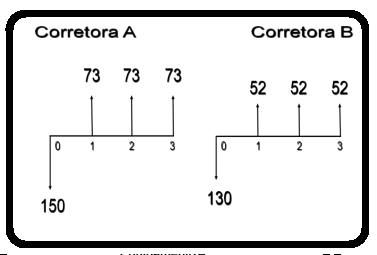


In [2]:
# função para comparar dois investimentos de mesmo período de tempo avaliando o vpl do fluxo de cai    B = inv_b.calc_vpl()
def comparar_invest_tempos_iguais_via_vpl(inv_a: investimento, inv_b: investimento):

    if(len(inv_a.fluxo_caixa) != len(inv_b.fluxo_caixa)):
        print("Erro! Períodos de tempo diferentes no fluxo de caixa, utilize outra função, ou corrija os valores no fluxo.")
        return

    # vpl investimento A
    A = inv_a.calc_vpl()
    # vlp investimento B
    B = inv_b.calc_vpl()

    print("Comparação de investimentos com mesmo período de tempo (" +
          str(len(inv_b.fluxo_caixa) - 1) + ") considerando VPL.")

    print("Investimento 1: ", A)
    print("Investimento 2: ", B)

    # avaliando qual investimento é melhor
    maior_vpl = A if A > B else B
    print("Melhor investimento, considerando maior valor VPL é: ", maior_vpl)

#####################################################################
######   Utilizando a função de avaliação de investimentos     ######
#####################################################################


# investimento 1
investimento1: investimento = investimento(
    taxa=0.1, fluxo_caixa=[-150, 73, 73, 73])

# investimento 2
investimento2: investimento = investimento(
    taxa=0.1, fluxo_caixa=[-130, 52, 52, 52])

comparar_invest_tempos_iguais_via_vpl(investimento1, investimento2)


Comparação de investimentos com mesmo período de tempo (3) considerando VPL.
Investimento 1:  31.54
Investimento 2:  -0.68
Melhor investimento, considerando maior valor VPL é:  31.54


## VPL - Período de Tempo Diferentes

Quando o período de tempo é diferente, deve-se observar se o fluxo de caixa repete-se ou não.

- Com repetição: o horizonte de planejamento deverá ser o mesmo e para isso utiliza-se o mínimo múltiplo comum (MMC) dos períodos antes de fazer o VPL de cada uma delas.
- Sem repetição: calcula-se o VPL diretamente, pois considera-se que na diferença entre os períodos os valores do fluxo de caixa sejam aplicados à TMA.


### VPL - Período de Tempo Diferente - Com Repetição

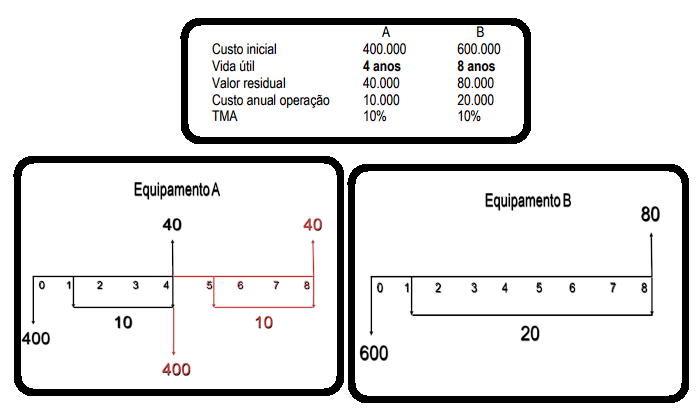


In [3]:
# investimento 1


### VPL - Período de Tempo Diferente - Sem Repetição

    vpl = - valor_presente + fluxo de caixa em valor presente + valor futuro em valor presente


In [4]:


def comparar_invest_tempos_diferente_sem_repeticao_via_vpl(inv_a: investimento, inv_b: investimento):

    A = inv_a.calc_vpl(incluir_valor_futuro=True)
    B = inv_b.calc_vpl(incluir_valor_futuro=True)

    print("Comparação de investimentos com períodos de tempo diferentes, sem repetição de valores.")

    print("Investimento 1: ", A)
    print("Investimento 2: ", B)

    # avaliando qual investimento é melhor
    maior_vpl = A if A > B else B
    print("Melhor investimento, considerando maior valor de VPL é: ", maior_vpl)

#####################################################################
######   Utilizando a função de avaliação de investimentos     ######
#####################################################################

# investimento 1
inv1: investimento = investimento(
    taxa=0.1,
    fluxo_caixa=[-600_000, 150_000, 150_000,
                 150_000, 150_000, 150_000, 150_000],
    valor_futuro=100_000
)

# investimento 2
inv2: investimento = investimento(
    taxa=0.1,
    fluxo_caixa=[-300_000, 120_000, 120_000, 120_000, 120_000],
    valor_futuro=120_000
)

comparar_invest_tempos_diferente_sem_repeticao_via_vpl(inv1, inv2)


Comparação de investimentos com períodos de tempo diferentes, sem repetição de valores.
Investimento 1:  158694.6
Investimento 2:  276940.83
Melhor investimento, considerando maior valor de VPL é:  276940.83
